# Plotting watershed and surrounding water

In this notebook the watershed data as extracted from the HydroSHEDS dataset in the previous two notebooks is plotted.

In [ ]:
import geopandas as gp
import pandas as pd
import time
from matplotlib import pyplot as plt
from descartes import PolygonPatch

Loading data

In [11]:
%qtconsole

In [12]:
padma = gp.read_file('out/padma.shp')

In [13]:
padma = padma.set_index('ARCID')

In [14]:
water = gp.read_file('out/water_in_region.shp')

In [15]:
water = water.set_index('ARCID')

In [16]:
regions = gp.read_file('adm regions/combined.shp')

In [17]:
water_excl = water[~water.isin(padma)]

In [36]:
water_excl = water_excl[water_excl['geometry'].notnull()]

In [37]:
water_excl.to_file('out/water_in_region_excl.shp')

In [9]:
west, south, east, north = padma.total_bounds

## Plot of watershed

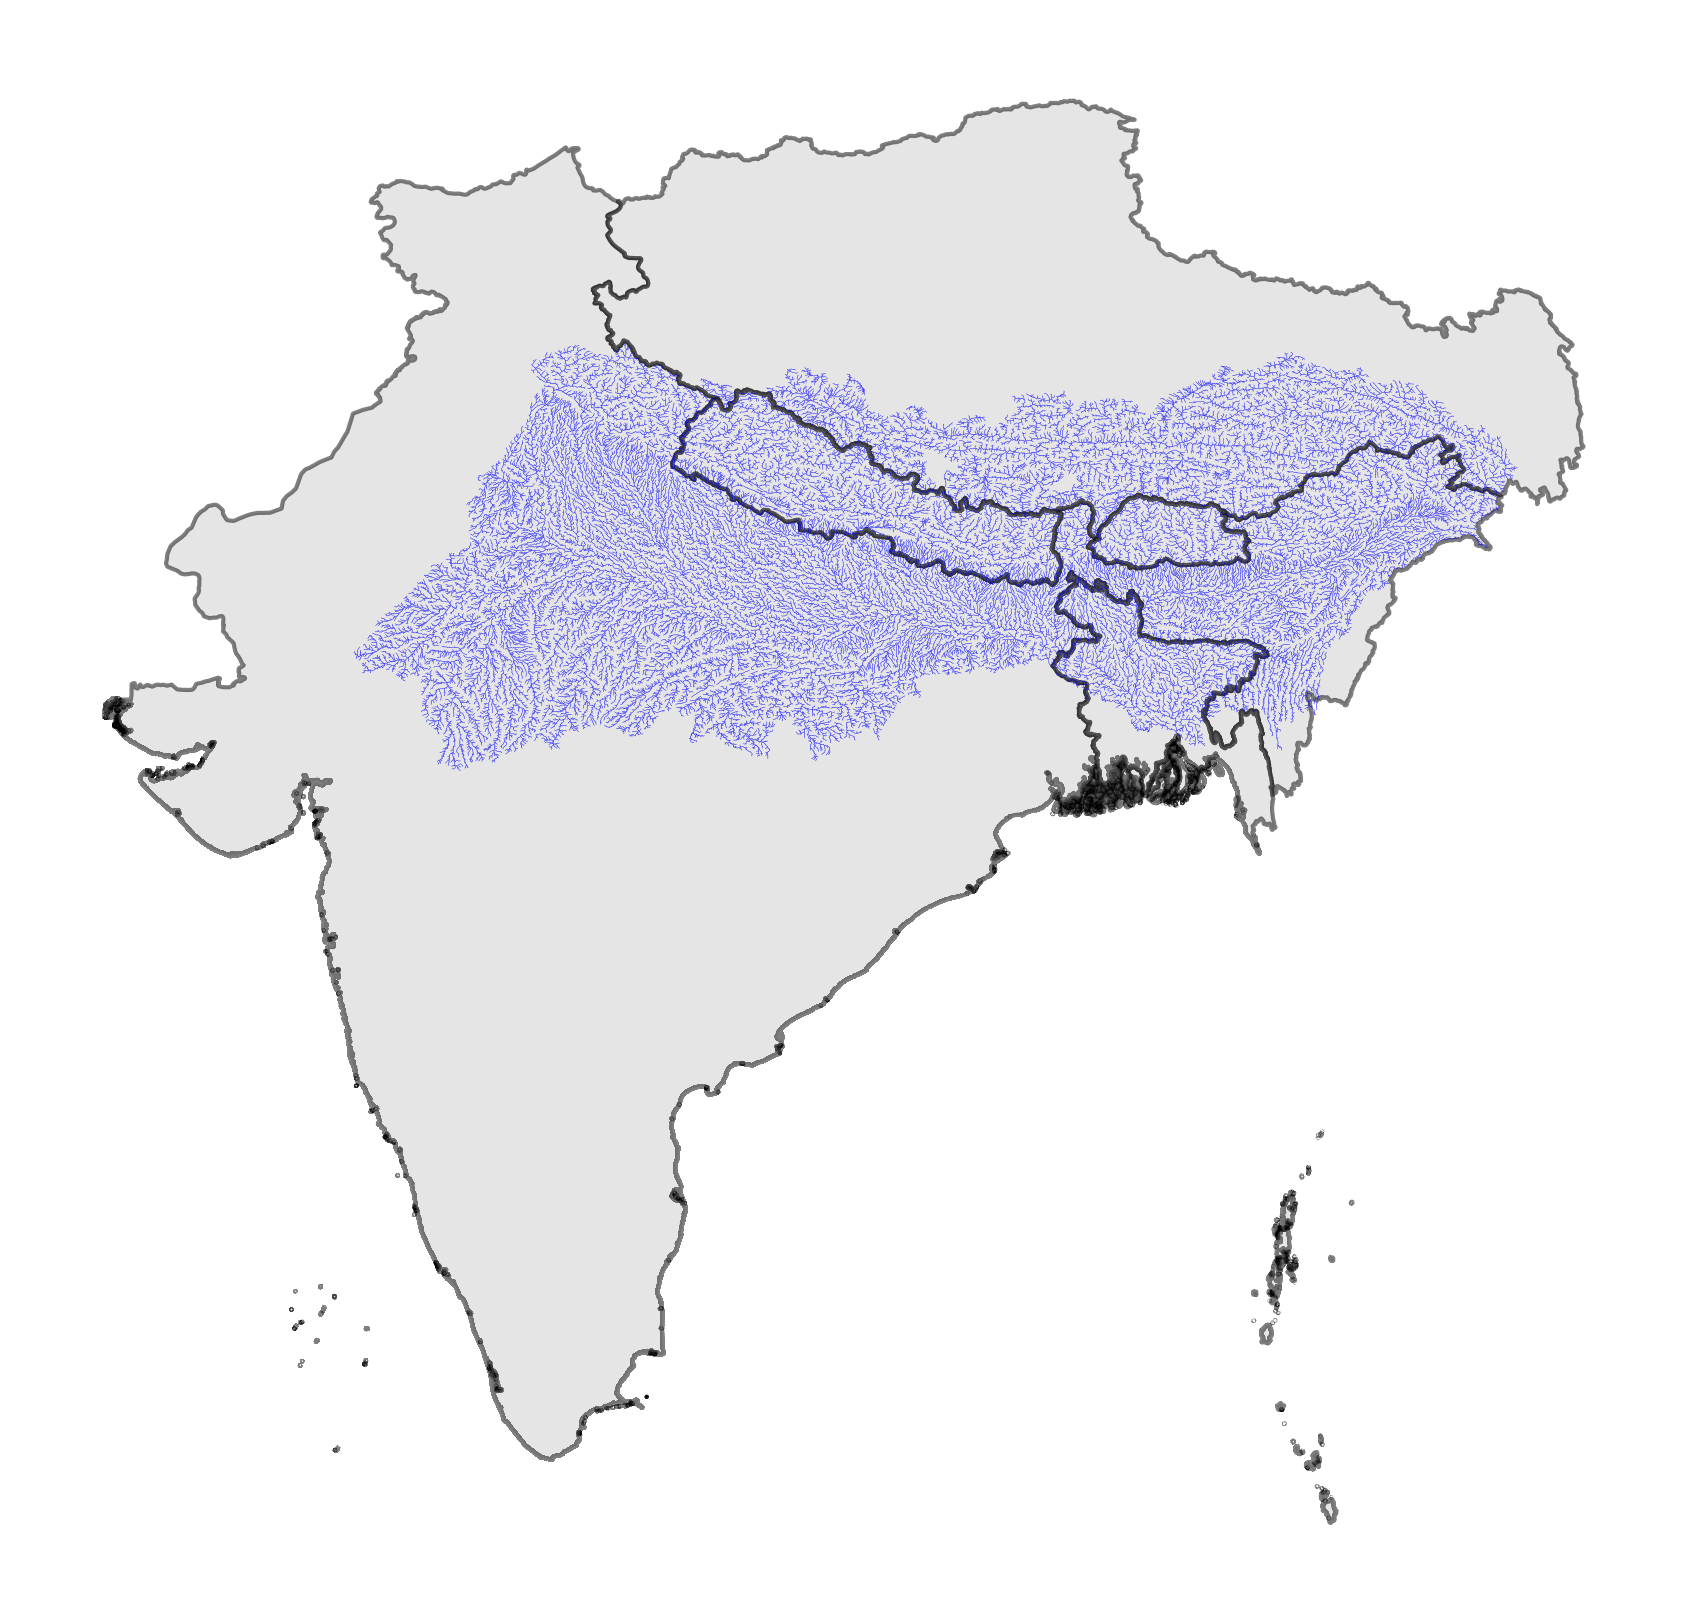

In [10]:
#fig, ax = plt.subplots(1, figsize=(7,7))
fig = plt.figure(figsize=(7,7),dpi=300)
ax = fig.add_subplot(111)
regions.plot(ax=ax,fc='#cccccc', ec='k', alpha=0.5, zorder=2)
padma.plot(ax=ax,color='b',linewidth=0.1)
#water_excl.plot(ax=ax,color='r')

#ax.set_xlim(west-4, east+1)
#ax.set_ylim(south-3, north+5)
ax.axis('off')
plt.savefig('../thesis/report/figs/padma_watershed.png', bbox_inches = 'tight')
#plt.savefig('../thesis/report/figs/padma_watershed.pdf', bbox_inches = 'tight')

## Plot of watershed with highlighted main river lines

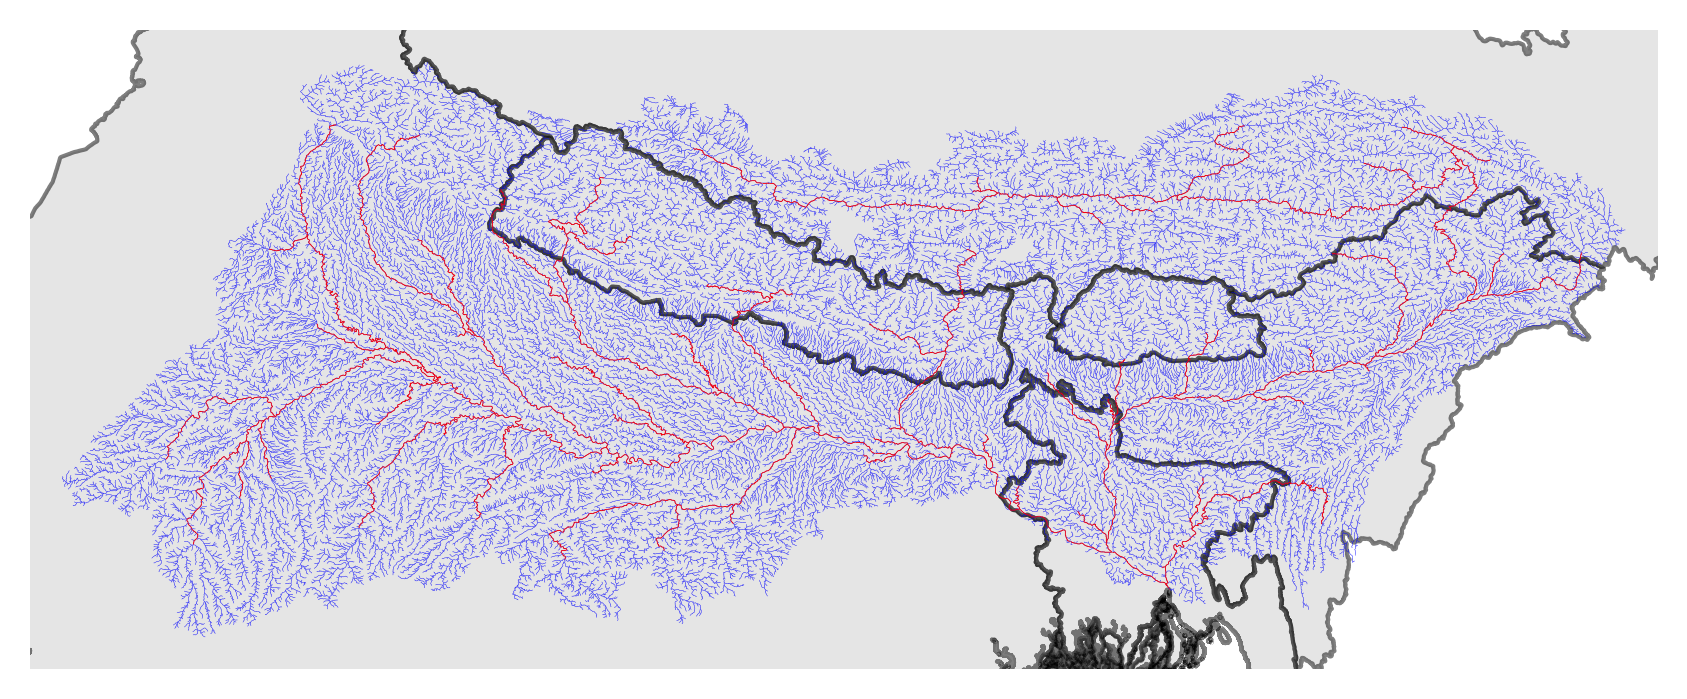

In [15]:
fig, ax = plt.subplots(1, figsize=(7,7),dpi=300)
regions.plot(ax=ax,fc='#cccccc', ec='k', alpha=0.5, zorder=2)
padma.plot(ax=ax,color='b',linewidth=0.1)
padma[padma.UP_CELLS>50000].plot(ax=ax,color='r',linewidth=0.2)
#water_excl.plot(ax=ax,color='r')

ax.set_xlim(west-0.5, east+0.5)
ax.set_ylim(south-0.5, north+0.5)
ax.axis('off')
plt.savefig('../thesis/report/figs/padma_watershed_mainlines_2.png', bbox_inches = 'tight')
#plt.savefig('../thesis/report/figs/padma_watershed.pdf', bbox_inches = 'tight')

Compare with this wikipedia image of the Ganges Brahmaputra Basin:

![Wikipedia image of Ganges-Brahmaputra Basin](https://upload.wikimedia.org/wikipedia/commons/3/34/Ganges-Brahmaputra-Meghna_basins.jpg)

### Plot of watershed with highlighted main river lines, less strict

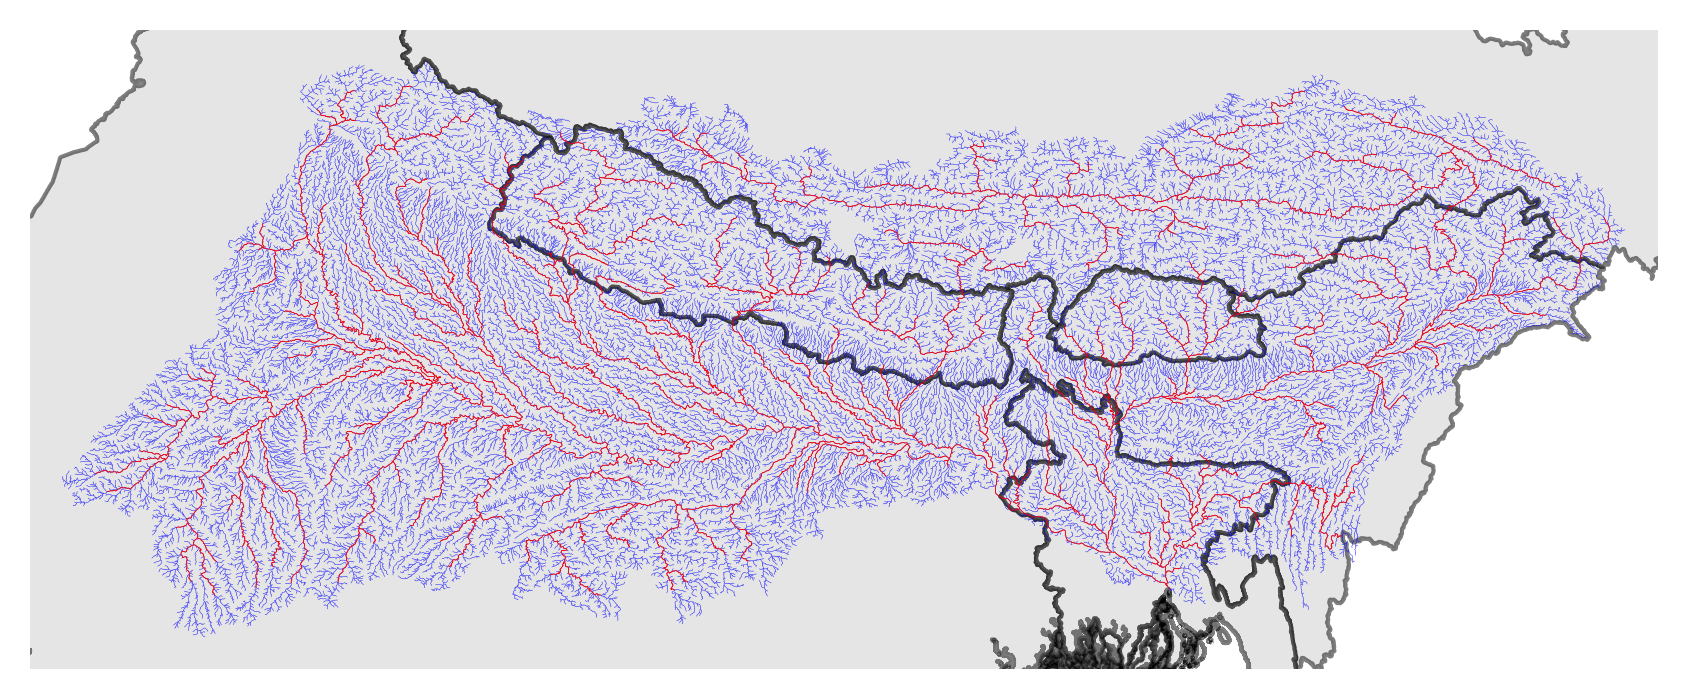

In [12]:
fig, ax = plt.subplots(1, figsize=(7,7),dpi=300)
regions.plot(ax=ax,fc='#cccccc', ec='k', alpha=0.5, zorder=2)
padma.plot(ax=ax,color='b',linewidth=0.1)
padma[padma.UP_CELLS>10000].plot(ax=ax,color='r',linewidth=0.2)
#water_excl.plot(ax=ax,color='r')

ax.set_xlim(west-0.5, east+0.5)
ax.set_ylim(south-0.5, north+0.5)
ax.axis('off')
plt.savefig('../thesis/report/figs/padma_watershed_mainlines.png', bbox_inches = 'tight')
#plt.savefig('../thesis/report/figs/padma_watershed.pdf', bbox_inches = 'tight')

## Plot of watershed with river sections not in the watershed, but within the region

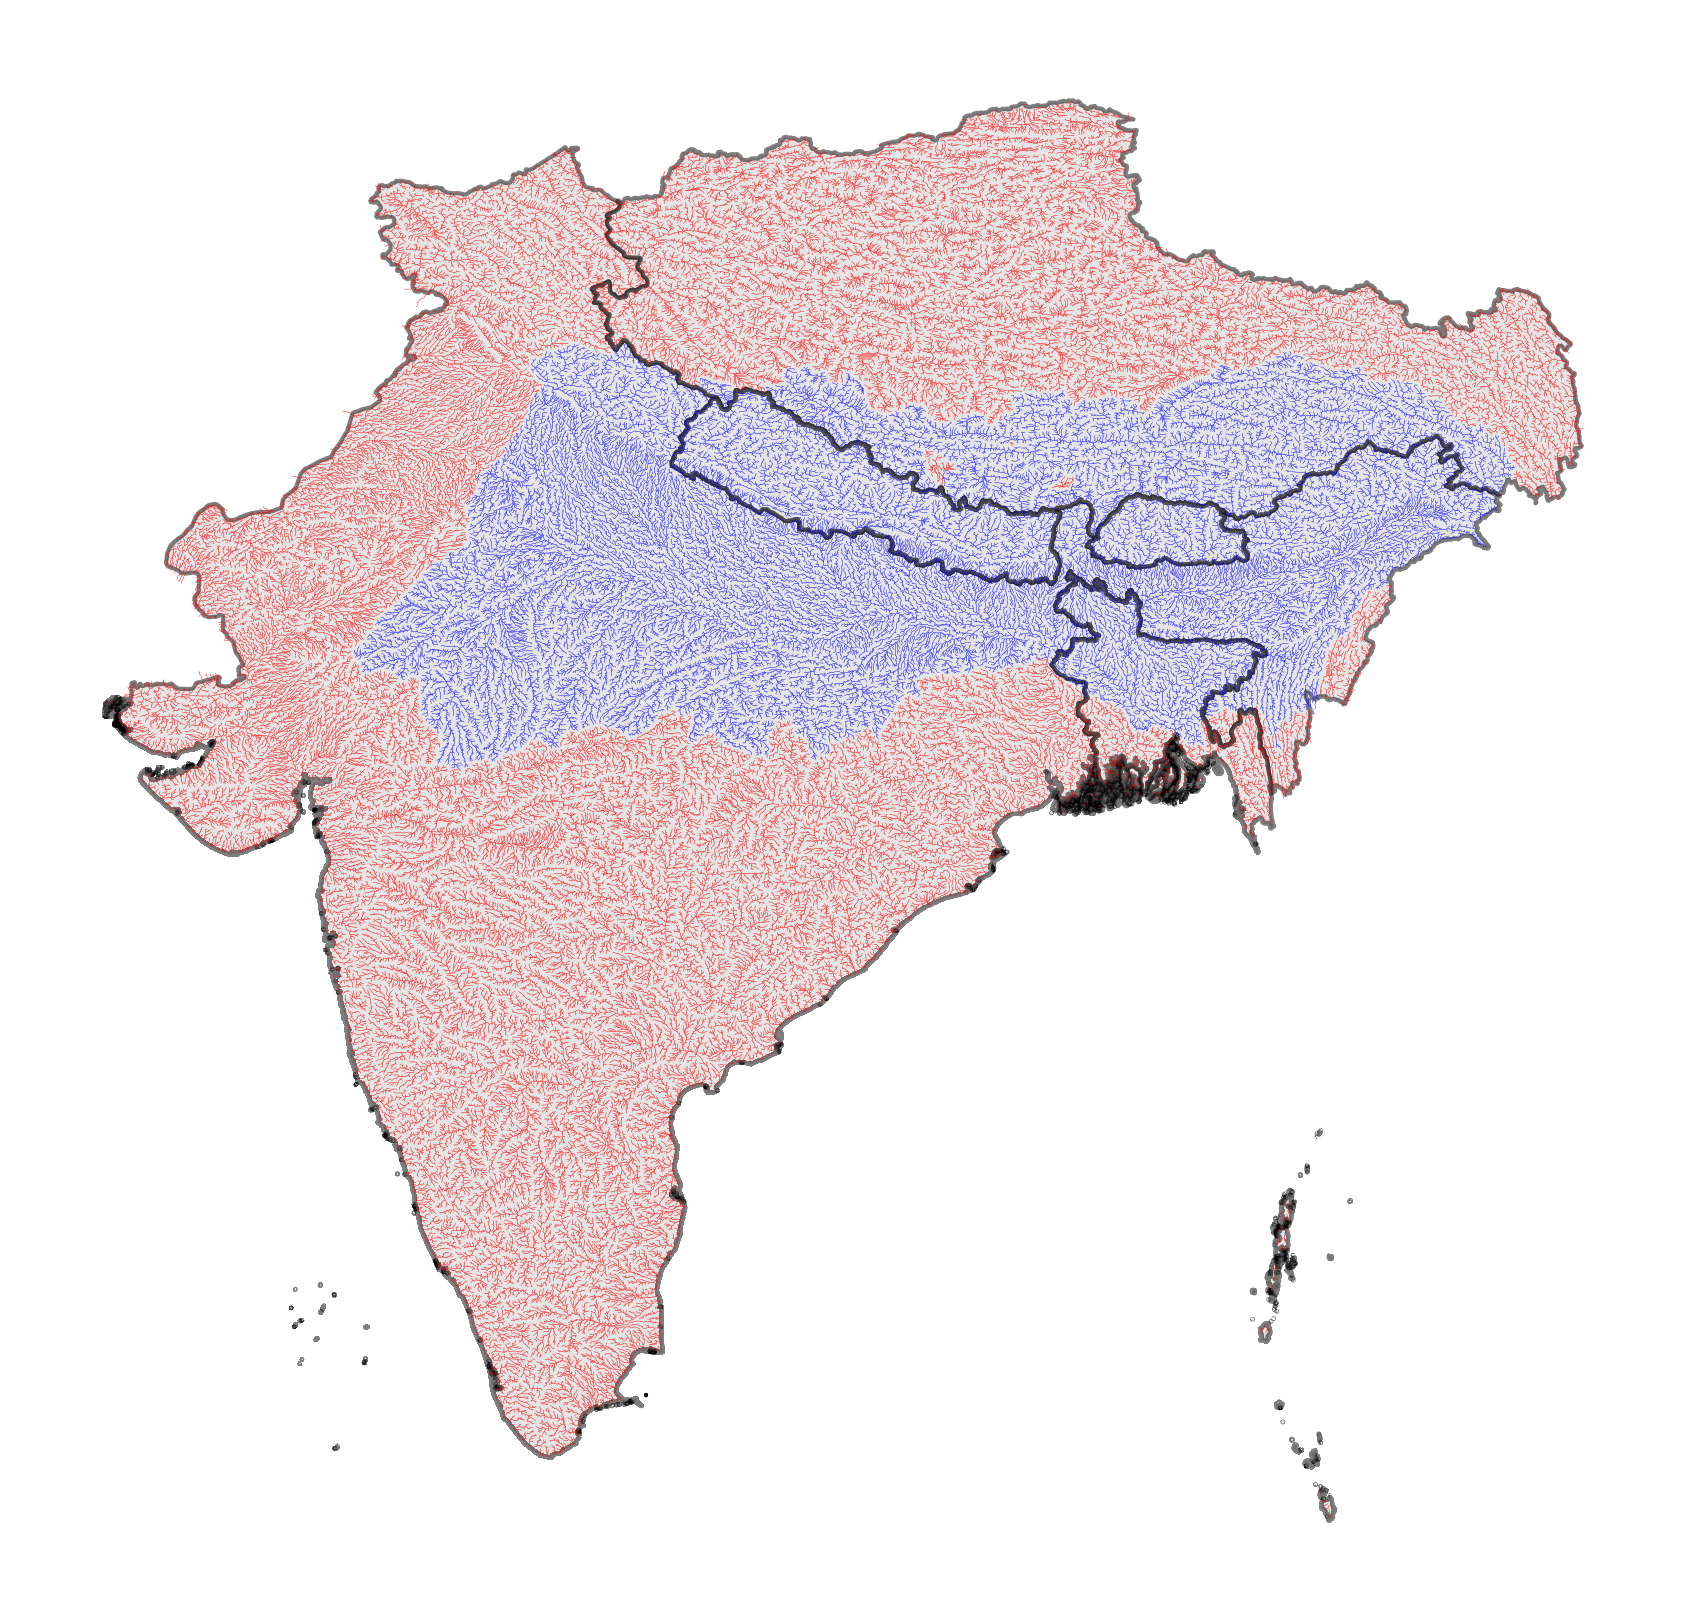

In [13]:
fig, ax = plt.subplots(1, figsize=(7,7),dpi=300)
regions.plot(ax=ax,fc='#cccccc', ec='k', alpha=0.5, zorder=2)
padma.plot(ax=ax,color='b',linewidth=0.1)
water_excl.plot(ax=ax,color='r',linewidth=0.1)

ax.axis('off')
plt.savefig('../thesis/report/figs/padma_watershed_all_water.png', bbox_inches = 'tight')
#plt.savefig('../thesis/report/figs/padma_watershed_all_water.pdf', bbox_inches = 'tight')